# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [86]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [87]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [88]:
# set up lists to hold reponse info
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []
index_counter = 0
set_counter = 1


# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("--------------------------------------------")
count = 0
set = 1
for index, city in enumerate(cities):
    count = count + 1
    # To avoid api call rate limits, get city weather data for 50 cities,
    # then sleep for 5 seconds, and then continue with next 50 cities and so on...
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | ust-kuyga
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | okakarara
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 1 of Set 1 : illoqqortoormiut
Processing Record 6 of Set 1 | rudbar
Processing Record 7 of Set 1 | marsaxlokk
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | mount isa
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | jinchang
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 2 of Set 1 : tumannyy
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | saint-augustin
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | 

City not found. Skipping...
Processing Record 15 of Set 1 : tidore
Processing Record 26 of Set 4 | tagusao
Processing Record 27 of Set 4 | saint george
Processing Record 28 of Set 4 | lakes entrance
Processing Record 29 of Set 4 | soyo
Processing Record 30 of Set 4 | taoudenni
Processing Record 31 of Set 4 | george town
Processing Record 32 of Set 4 | marsa matruh
Processing Record 33 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 16 of Set 1 : tsihombe
Processing Record 34 of Set 4 | cabo san lucas
Processing Record 35 of Set 4 | bireun
Processing Record 36 of Set 4 | kutina
Processing Record 37 of Set 4 | tawkar
City not found. Skipping...
Processing Record 17 of Set 1 : tawkar
Processing Record 38 of Set 4 | culpeper
Processing Record 39 of Set 4 | norman wells
Processing Record 40 of Set 4 | luderitz
Processing Record 41 of Set 4 | hofn
Processing Record 42 of Set 4 | saint-philippe
Processing Record 43 of Set 4 | beibei
Processing Record 44 of Set 4 | lusambo
Pr

Processing Record 47 of Set 7 | agua dulce
Processing Record 48 of Set 7 | yumen
Processing Record 49 of Set 7 | constitucion
Processing Record 50 of Set 7 | colesberg
Processing Record 1 of Set 8 | uige
Processing Record 2 of Set 8 | viligili
City not found. Skipping...
Processing Record 33 of Set 1 : viligili
Processing Record 3 of Set 8 | kollam
Processing Record 4 of Set 8 | sarai alamgir
Processing Record 5 of Set 8 | rocha
Processing Record 6 of Set 8 | buraydah
Processing Record 7 of Set 8 | sokolniki
Processing Record 8 of Set 8 | nanortalik
Processing Record 9 of Set 8 | yarada
Processing Record 10 of Set 8 | amderma
City not found. Skipping...
Processing Record 34 of Set 1 : amderma
Processing Record 11 of Set 8 | fairbanks
Processing Record 12 of Set 8 | barra do garcas
Processing Record 13 of Set 8 | ponta delgada
Processing Record 14 of Set 8 | qaqortoq
Processing Record 15 of Set 8 | mattawa
Processing Record 16 of Set 8 | buchanan
Processing Record 17 of Set 8 | mariesta

Processing Record 25 of Set 11 | tuggurt
City not found. Skipping...
Processing Record 46 of Set 1 : tuggurt
Processing Record 26 of Set 11 | san carlos de bariloche
Processing Record 27 of Set 11 | kitakata
Processing Record 28 of Set 11 | mareeba
Processing Record 29 of Set 11 | linhares
Processing Record 30 of Set 11 | sakakah
Processing Record 31 of Set 11 | vestmanna
Processing Record 32 of Set 11 | tukums
Processing Record 33 of Set 11 | peleduy
Processing Record 34 of Set 11 | kandrian
Processing Record 35 of Set 11 | abeche
Processing Record 36 of Set 11 | codrington
Processing Record 37 of Set 11 | meulaboh
Processing Record 38 of Set 11 | zouxian
City not found. Skipping...
Processing Record 47 of Set 1 : zouxian
Processing Record 39 of Set 11 | samfya
Processing Record 40 of Set 11 | pathein
Processing Record 41 of Set 11 | kishi
Processing Record 42 of Set 11 | novopokrovka
Processing Record 43 of Set 11 | haines junction
Processing Record 44 of Set 11 | the valley
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [90]:
# Convert raw data to dataframe.
city_weather_df = pd.DataFrame({
    "City": cities,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
    
})

# Drop any cities that were skipped because they could not be found using the OpenWeatherMap API.
city_weather_df = city_weather_df.dropna(how="any")
print(city_weather_df.count())

# Export the city data into a .csv file.
city_weather_df.to_csv("./output_data/city_weather_data.csv", index=False)

# Display the DataFrame
weather_df = pd.read_csv("./output_data/city_weather_data.csv")

weather_df.head()

City          558
Latitude      558
Longitude     558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64


City  Latitude  Longitude  Max Temp  Humidity  Cloudiness  \
0     ust-kuyga   70.0167   135.6000     20.84      94.0       100.0   
1  punta arenas  -53.1500   -70.9167     46.51      66.0        75.0   
2      hermanus  -34.4187    19.2345     53.80      85.0        77.0   
3     okakarara  -20.5833    17.4333     68.41      14.0         0.0   
4        rudbar   30.1500    62.6000     61.61      15.0         0.0   

   Wind Speed Country          Date  
0        9.75      RU  1.665267e+09  
1       19.57      CL  1.665266e+09  
2        8.59      ZA  1.665266e+09  
3        5.77     NaN  1.665267e+09  
4        7.99      AF  1.665267e+09

In [91]:
#example below from start of the assignment for checking

In [92]:
#create a data frame with the info below in the example provided

weather_df.describe()

Latitude   Longitude    Max Temp    Humidity  Cloudiness  Wind Speed  \
count  558.000000  558.000000  558.000000  558.000000  558.000000  558.000000   
mean    19.889834   19.074554   61.794176   70.600358   51.745520    8.431810   
std     33.594468   88.827474   18.680698   21.499358   39.418116    5.627405   
min    -54.800000 -175.200000    5.430000   12.000000    0.000000    0.000000   
25%     -7.576250  -60.189175   49.312500   59.250000   10.000000    4.160000   
50%     22.180350   23.402450   65.345000   76.000000   50.000000    7.300000   
75%     49.827725   96.157150   76.882500   88.000000   97.000000   11.360000   
max     78.218600  179.316700   97.740000  100.000000  100.000000   33.380000   

               Date  
count  5.580000e+02  
mean   1.665267e+09  
std    2.071788e+02  
min    1.665266e+09  
25%    1.665267e+09  
50%    1.665267e+09  
75%    1.665267e+09  
max    1.665267e+09

In [93]:
#example below from start of the assignment for checking

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [94]:
humidity_df = weather_df.loc[weather_df['Humidity'] <= 100]
humidity_df

City  Latitude  Longitude  Max Temp  Humidity  Cloudiness  \
0       ust-kuyga   70.0167   135.6000     20.84      94.0       100.0   
1    punta arenas  -53.1500   -70.9167     46.51      66.0        75.0   
2        hermanus  -34.4187    19.2345     53.80      85.0        77.0   
3       okakarara  -20.5833    17.4333     68.41      14.0         0.0   
4          rudbar   30.1500    62.6000     61.61      15.0         0.0   
..            ...       ...        ...       ...       ...         ...   
553    strezhevoy   60.7333    77.5889     42.69      92.0       100.0   
554        manado    1.4870   124.8455     75.97     100.0        40.0   
555       amuntai   -2.4177   115.2494     73.45      99.0        98.0   
556  batemans bay  -35.7167   150.1833     51.10      82.0        99.0   
557       astoria   46.1879  -123.8313     73.47      79.0         0.0   

     Wind Speed Country          Date  
0          9.75      RU  1.665267e+09  
1         19.57      CL  1.665266e+09  
2          8.59      ZA  1.665266e+09  
3          5.77     NaN  1.665267e+09  
4          7.99      AF  1.665267e+09  
..          ...     ...           ...  
553        3.56      RU  1.665267e+09  
554        3.44      ID  1.665267e+09  
555        0.74      ID  1.665267e+09  
556        7.56      AU  1.665267e+09  
557        8.05      US  1.665267e+09  

[558 rows x 9 columns]

In [95]:
humidity_df.describe()

Latitude   Longitude    Max Temp    Humidity  Cloudiness  Wind Speed  \
count  558.000000  558.000000  558.000000  558.000000  558.000000  558.000000   
mean    19.889834   19.074554   61.794176   70.600358   51.745520    8.431810   
std     33.594468   88.827474   18.680698   21.499358   39.418116    5.627405   
min    -54.800000 -175.200000    5.430000   12.000000    0.000000    0.000000   
25%     -7.576250  -60.189175   49.312500   59.250000   10.000000    4.160000   
50%     22.180350   23.402450   65.345000   76.000000   50.000000    7.300000   
75%     49.827725   96.157150   76.882500   88.000000   97.000000   11.360000   
max     78.218600  179.316700   97.740000  100.000000  100.000000   33.380000   

               Date  
count  5.580000e+02  
mean   1.665267e+09  
std    2.071788e+02  
min    1.665266e+09  
25%    1.665267e+09  
50%    1.665267e+09  
75%    1.665267e+09  
max    1.665267e+09

In [96]:
#  Get the indices of cities that have humidity over 100%.

humidity_df.count["city"]

TypeError: 'method' object is not subscriptable

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

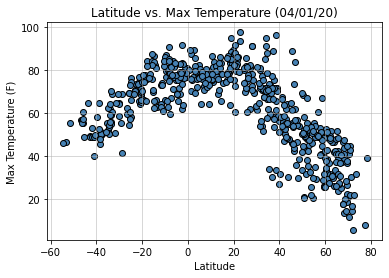

In [98]:
date_of_analysis = datetime.date(datetime.now())
# Create a scatter plot for latitude vs max temperature.
x_values = weather_df['Latitude']
y_values = weather_df['Max Temp']
plt.scatter(x_values, y_values, facecolor = "steelblue", edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"Latitude vs. Max Temperature (04/01/20)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../Images/latitude_vs_temperature.png", bbox_inches="tight")
plt.show()

The above scatter plot shows how a cities max temperature is connected to its latitude. Especially, thr data from the visual shows how the maximum temperature changes closer you get (or further) from the equator (Latitude of 0). For example, the cities with the highest maximum temperatures are closest to the equator (that is, cities from about -40 to 20 degrees Latitude). As you go farther south into the southern hemisphere, the max temperature starts to decrease. And, as you go farther north in the northern hemisphere, the max temperature steadily decreases as well. So, from this graph, we can conclude that the hottest temperatures for a city are higher for a city that is closer to the equator and lower for a city farther north or south.

## Latitude vs. Humidity Plot

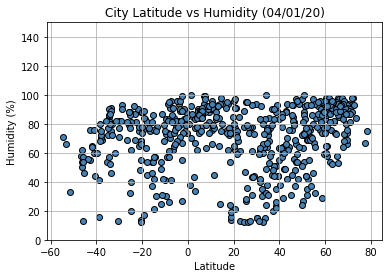

In [99]:
# Create a scatter plot for latitude vs humidity.
x_values = weather_df['Latitude']
y_values = weather_df['Humidity']
plt.scatter(x_values, y_values, facecolor = "steelblue", edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity (04/01/20)')
plt.ylim(0, 150)
plt.grid()
plt.savefig("../Images/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

The above scatter plot shows how a city's humidity is related to its latitude. Specifically, it shows how humidity changes as you get closer (or farther) away from the equator (Latitude of 0). Looking at this graph, the data points are scattered pretty evenly throughout, and it does not appear that there is a strong correlation between a city's latitude and humidity. Most cities (near the equator or farther away) that are shown in this graph have a humidity from about 60% to 100%. So, high humidity occurs in cities irregardless of latitude. However, there are a few cities that have low humidity, and according this graph, these cities are found only near the equaor. Besides a few outliers, there are not really any cities farther away from the equator that have low humidity.

## Latitude vs. Cloudiness Plot

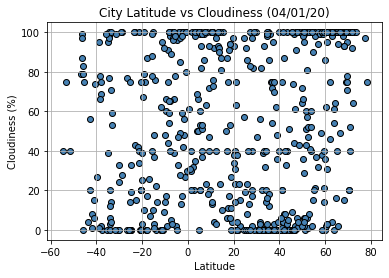

In [100]:
# Create a scatter plot for latitude vs cloudiness.
x_values = weather_df['Latitude']
y_values = weather_df['Cloudiness']
plt.scatter(x_values, y_values, facecolor = "steelblue", edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness (04/01/20)')
plt.grid()
plt.savefig("../Images/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

The above scatter plot shows how a city's cloudiness is related to its latitude. Specifically, it shows how cloudiness changes as you get closer (or farther) away from the equator (latitude of 0). Looking at this graph, the data points are pretty spread out evenly on the graph. Most cities (near or far from the equator) either generally have a really low cloudiness level (near 0) or a really high cloudiness level (near 100). So, most of the data points are near the extremes. However, there are cities that have a cloudiness level somewhere in between. Because the data points are scattered, it does not appear that there is a strong correlation between a city's latitude and cloudiness. That is, from the OpenWeatherMap API, we were able to find cites near the equator that had a low cloudiness level, a high cloudiness level, or a cloudiness level somewhere in between. The same goes for cities farther away from the equator.

## Latitude vs. Wind Speed Plot

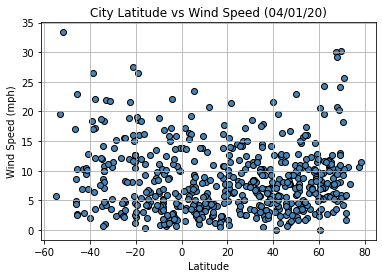

In [101]:
# Create a scatter plot for latitude vs wind speed.
x_values = weather_df['Latitude']
y_values = weather_df['Wind Speed']
plt.scatter(x_values, y_values,facecolor = "steelblue", edgecolor = "black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed (04/01/20)')
plt.grid()
plt.savefig("../Images/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

The above scatter plot shows how a city's wind speed is related to its latitude. Specifically, it shows how wind speed changes as you get closer (or farther) away from the equator (latitude of 0). Looking at this graph, the data points are clustered around lower wind speed values. Both cities near the equator and farther away from the equator appear to have lower wind speeds. So, from the above graph, it does not appear that there is a strong correlation between a city's latitude and wind speed. Also, I think it is important to point out that there are some cities farther away from the equator in the southern hemisphere (-20 to -40 Latitude) and in the northern hemisphere (40 to 60 Latitude) that have higher wind speeds.

## Linear Regression

In [102]:
# Create a function to create linear regression plots.
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today}")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.savefig(f"../Images/{hemisphere}_{x_label}_vs_{y_label}.png", bbox_inches="tight")
    return plt.plot(x_values,regress_values,"r-")


In [103]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_weather_df = weather_df.loc[weather_df["Latitude"] >= 0]
southern_hemisphere_weather_df = weather_df.loc[weather_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.688120894588156
The correlation between both factors is -0.83


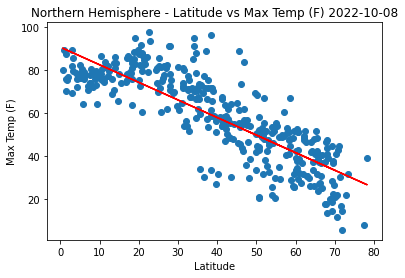

In [104]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Northern",(0, 0))

The linear regression modeling for maximum temperature vs latitude for the northern hemisphere shows that there is a strong, negative correlation between maximum temperature and latitude. That is, as you go father north away from the equator (latitude is increasing), the maximum temperature steadily decreases. And, vice versa, the closer you get to the equator away from higher latitudes (latitude is decreasing), the maximum temperature steadily increases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6059447462621333
The correlation between both factors is 0.78


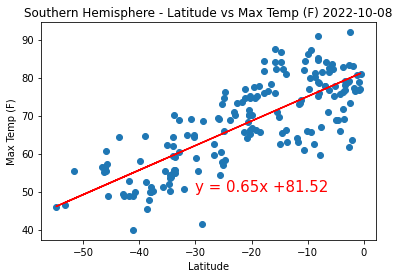

In [105]:
# Create a scatter plot for latitude vs max temp (southern hemisphere)
x_values = southern_hemisphere_weather_df['Latitude']
y_values = southern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Southern",(-30, 50))

The linear regression modeling for maximum temperature vs latitude for the southern hemisphere shows that there is a weak, positive correlation between maximum temperature and latitude. That is, as you go closer and closer to the equator (latitude is increasing), the max temperature increases but by not very much (as indicated by the small slope of the linear regression line). And, vice versa, as you go farther away from the equator (latitude is decreasing), the maximum temperature also decreases but by not very much (as indicated by the small slope of the linear regression line).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.011043049272911255
The correlation between both factors is 0.11


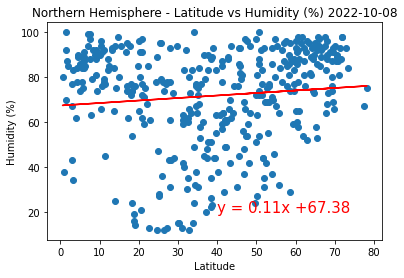

In [106]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))

The linear regression modeling for humidity vs latitude for the northern hemisphere shows that there is a weak, positive correlation between humidity and latitude. That is, as latitude increases (you are moving farther and farther away from the equator), the humidity level increases just slightly. We can tell that the humidity level doesn't increase by much by the small slope of the linear regression line. In addition, the opposite is also true. As we move closer to the equator (latitude is decreasing), the humidity level decreases but not by very much.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.011043049272911255
The correlation between both factors is 0.11


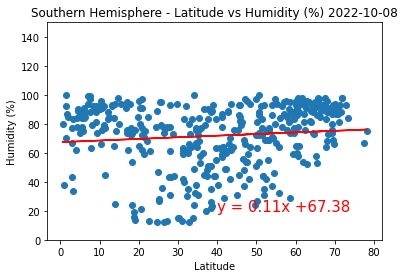

In [107]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values1 = southern_hemisphere_weather_df['Latitude']
y_values1 = southern_hemisphere_weather_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 20), 150)

The linear regression modeling for humidity vs latitude for the southern hemisphere shows that there is a weak, positive correlation between humidity and latitude. That is, as latitude increases (you are moving closer to the equator), the humidity level increases but only slightly. We can tell that the humidity level doesn't increase by much by the small slope of the linear regression line. In addition, the opposite is also true. As we move farther away from the equator (latitude is decreasing), the humidity level decreases but not by very much. Overall, latitude does not have much of an influence on humidity in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.026498160365090423
The correlation between both factors is 0.16


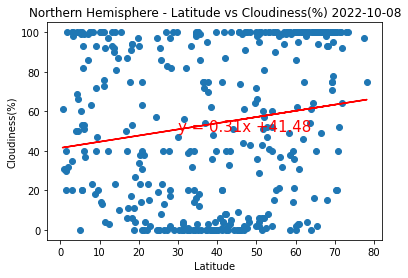

In [108]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))


The linear regression modeling for cloudiness vs latitude for the northern hemisphere shows that there is a very weak (or possibly none), positive correlation between latitude and cloudiness. That is, as you move farther away from the equator (latitude increases) or as you move closer to the equator (latitude decreases), latitude does not seem to affect or have an influence on how cloudy it is. This is shown in the graph as the data points being scattered all over the place.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.017719139409498586
The correlation between both factors is 0.13


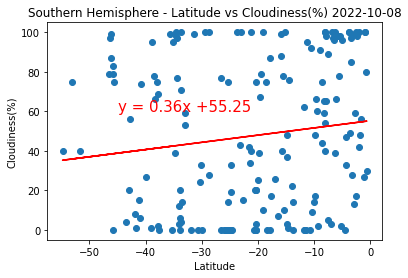

In [109]:

# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemisphere_weather_df['Latitude']
y_values = southern_hemisphere_weather_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

The linear regression modeling for cloudiness vs latitude for the southern hemisphere shows that there is a weak, positive correlation between latitude and cloudiness. That is, as you move farther away from the equator (latitude decreases) or as you move closer to the equator (latitude increases), latitude does not seem to have much of an effect or have an influence on how cloudy it is. This is shown in the graph as the data points being scattered all over the place. Also, it is important to note that although there is a weak correlation for the southern hemisphere, the correlation between cloudiness and latitude is a bit more stronger for the southern hemisphere than for the same factors for the northern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.021401904612663177
The correlation between both factors is 0.15


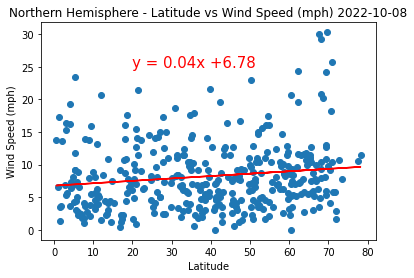

In [110]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = northern_hemisphere_weather_df['Latitude']
y_values = northern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))

The linear regression modeling for wind speed vs latitude for the northern hemisphere shows that there is a very weak (to almost none), positive correlation for wind speed and latitude. That is, as you go farther north away from the equator (latitude is increasing) or as you go towards the equator (latitude is decreasing), it appears as if latitude does not have much of any effect on the wind speed for cities. In fact, from the above graph, it appears that cities near and farther away from the equator in the norther hemisphere generally both have lower wind speeds despite a few outliers. This is shown in the graph as many of the data points being scattered towards the bottom half of the graph.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06058834190988938
The correlation between both factors is -0.25


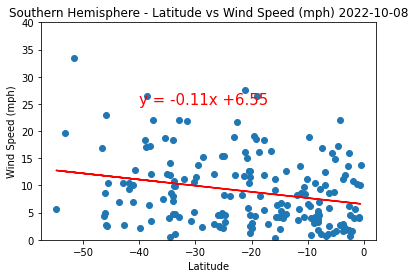

In [111]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemisphere_weather_df['Latitude']
y_values = southern_hemisphere_weather_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)

The linear regression modeling for wind speed vs latitude for the southern hemisphere shows that there is a weak, negative correlation for wind speed and latitude. That is, as you go farther south away from the equator (latitude is decreasing), wind speed slightly increases and as you go towards the equator (latitude is increasing), wind speed slightly decreases. This is indicated in the graph by the small, negative slope of the linear regression line. Overall, the correlation between these two factors is weak. Latitude has a small influence on wind speed but not much. However, it is important to note that the correlation between these two factors for the southern hemisphere is stronger than the correlation between these two factors for the northern hemisphere.